# Pengujian Terhadap Depth

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('..')

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer, InputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType, RegularizationType
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

## 1. Depth = 1 | Width = 20

In [4]:
input_size = 784
hidden_layers = 1
output_size = 10
param_1 = 0
param_2 = 0.5
batch_size = 64

In [5]:
ann1 = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

In [6]:
loss1 = ann1.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=0.01,
        epochs=20,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

Training: 100%|██████████| 20/20 [00:32<00:00,  1.63s/it, Loss: 1.8973, Val Loss: 1.9114]

Total training time: 31.69s


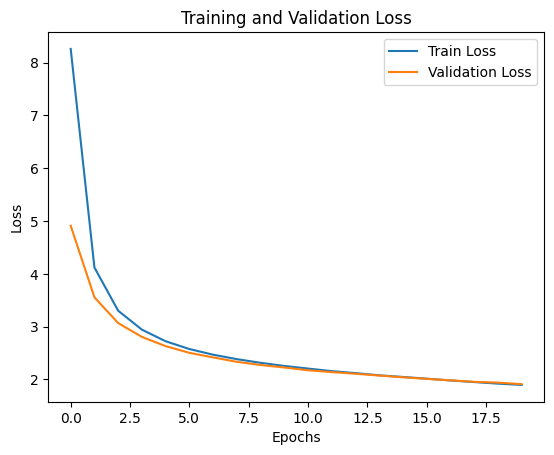

In [7]:
epoch_losses1, val_losses1 = loss1

plt.plot(epoch_losses1, label='Train Loss')
plt.plot(val_losses1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import f1_score

y_pred1 = ann1.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred1, average='macro')}")

F1 Score: 0.9314411872953958


## 2. Depth = 3 | Width = 20

In [8]:
input_size = 784
hidden_layers = 3
output_size = 10
param_1 = 0
param_2 = 0.5
batch_size = 64

In [9]:
ann2 = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

In [10]:
loss2 = ann2.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=0.01,
        epochs=20,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

Training: 100%|██████████| 20/20 [00:41<00:00,  2.10s/it, Loss: 1.1190, Val Loss: 1.2485]

Total training time: 40.57s


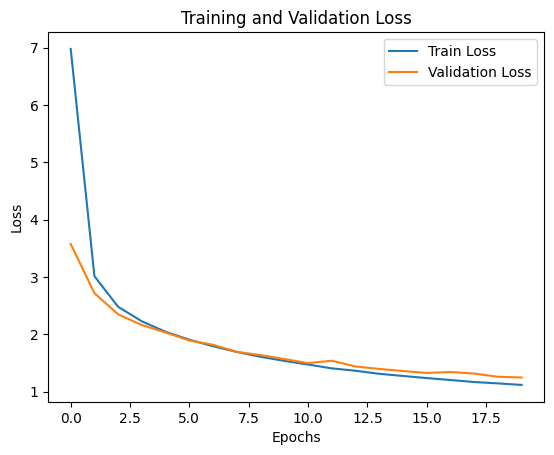

In [11]:
epoch_losses2, val_losses2 = loss2

plt.plot(epoch_losses2, label='Train Loss')
plt.plot(val_losses2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import f1_score

y_pred2 = ann2.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred2, average='macro')}")

F1 Score: 0.9496421025330465


## 3. Depth = 5 | Width = 20

In [12]:
input_size = 784
hidden_layers = 5
output_size = 10
param_1 = 0
param_2 = 0.5
batch_size = 64

In [13]:
ann3 = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

In [14]:
loss3 = ann3.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=0.01,
        epochs=20,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

Training: 100%|██████████| 20/20 [00:55<00:00,  2.76s/it, Loss: 0.8806, Val Loss: 1.0202]

Total training time: 53.35s


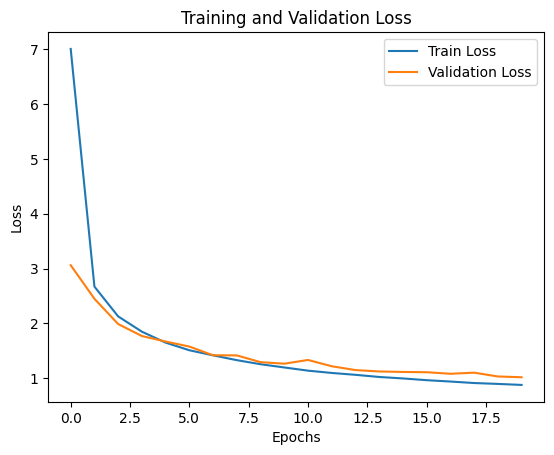

In [15]:
epoch_losses3, val_losses3 = loss3

plt.plot(epoch_losses3, label='Train Loss')
plt.plot(val_losses3, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import f1_score

y_pred3 = ann3.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred3, average='macro')}")

F1 Score: 0.9537950284967625
